In [9]:
import datetime
import pandas as pd
import newspaper
from newspaper import Article
from time import mktime
from datetime import datetime, timedelta
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize.regexp import WhitespaceTokenizer
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from textblob import TextBlob

[nltk_data] Downloading package punkt to /Users/hsaul/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/hsaul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
##Iterate through JSON files in github and load into notebook

newspapers = ['Breitbart','Business_Insider','Fox News','Financial Times','MarketWatch','NYTimes','Reuters','The Guardian','WSJ']
times = ['1_1','1_2','1_3','1_4','2_1','2_2','2_3','2_4','3_1','3_2','3_3','3_4','4_1','4_2']
df = pd.DataFrame(columns = ["newspaper","time","keywords"])

for paper in newspapers: 
    for time in times:
        print(paper,time)
        with open(paper+'/'+time+'.json') as json_file:
            total_data = json.load(json_file)
            
            ##Make an empty list for every article, derive the keywords and append to list
            l=[]
            for data in total_data['articles']['results']:
                art = Article(url=data['url'])
                try:
                    art = Article(url=data['url'])
                    art.download()
                    art.parse()
                    art.nlp()
                    l.append(art.keywords)
                    
                except:
                    continue
                    
           #updated empty list creates flat keywords without '' 
            list1=[]
            list1 = [item for sublist in l for item in sublist]
            
            #Append data to dataframe    
            df = df.append({'newspaper': paper, 'time': time, 'keywords': list1}, ignore_index=True)
            
            
            
        

Breitbart 1_1
Breitbart 1_2
Breitbart 1_3
Breitbart 1_4
Breitbart 2_1
Breitbart 2_2
Breitbart 2_3
Breitbart 2_4
Breitbart 3_1
Breitbart 3_2
Breitbart 3_3
Breitbart 3_4
Breitbart 4_1
Breitbart 4_2
Business_Insider 1_1
Business_Insider 1_2
Business_Insider 1_3
Business_Insider 1_4
Business_Insider 2_1
Business_Insider 2_2
Business_Insider 2_3
Business_Insider 2_4
Business_Insider 3_1
Business_Insider 3_2
Business_Insider 3_3
Business_Insider 3_4
Business_Insider 4_1
Business_Insider 4_2
Fox News 1_1
Fox News 1_2
Fox News 1_3
Fox News 1_4
Fox News 2_1
Fox News 2_2
Fox News 2_3
Fox News 2_4
Fox News 3_1
Fox News 3_2
Fox News 3_3
Fox News 3_4
Fox News 4_1
Fox News 4_2
Financial Times 1_1
Financial Times 1_2
Financial Times 1_3
Financial Times 1_4
Financial Times 2_1
Financial Times 2_2
Financial Times 2_3
Financial Times 2_4
Financial Times 3_1
Financial Times 3_2
Financial Times 3_3
Financial Times 3_4
Financial Times 4_1
Financial Times 4_2
MarketWatch 1_1
MarketWatch 1_2
MarketWatch 1_3


Building prefix dict from /opt/anaconda3/lib/python3.7/site-packages/jieba/dict.txt ...
Loading model from cache /var/folders/9x/5lmhqld910d93ww9yzfx4l6c0000gn/T/jieba.cache
Loading model cost 0.8805420398712158 seconds.
Prefix dict has been built succesfully.


WSJ 1_4
WSJ 2_1
WSJ 2_2
WSJ 2_3
WSJ 2_4
WSJ 3_1
WSJ 3_2
WSJ 3_3
WSJ 3_4
WSJ 4_1
WSJ 4_2


In [40]:
df.to_json(r'wordcloud_data.json')

In [39]:
df
        

,newspaper,date,keywords
0,Breitbart,1/6/20,[]
1,Breitbart,1/13/20,[]
2,Breitbart,1/20/20,"['international', 'chinese', 'patients', 'coro..."
3,Breitbart,1/27/20,"['trolls', 'coronavirus', 'force', 'black', 't..."
4,Breitbart,2/3/20,"['party', 'chinese', 'li', 'case', 'botched', ..."
...,...,...,...
121,WSJ,3/9/20,"['bid', 'wall', 'street', 'stimulus', 'sums', ..."
122,WSJ,3/16/20,"['department', 'claims', 'jobless', 'administr..."
123,WSJ,3/23/30,"['true', 'coronavirus', 'orders', 'deadly', 's..."
124,WSJ,3/30/20,"['store', 'say', 'experts', 'safety', 'virus',..."


In [15]:
total_data 

{'articles': {'results': [{'uri': '6026265194',
    'lang': 'eng',
    'isDuplicate': False,
    'date': '2020-04-09',
    'time': '14:00:00',
    'dateTime': '2020-04-09T14:00:00Z',
    'dateTimePub': '2020-04-09T13:47:00Z',
    'dataType': 'news',
    'sim': 0.5333333611488342,
    'url': 'https://www.wsj.com/articles/farmers-deal-with-glut-of-food-as-coronavirus-closes-restaurants-11586439722',
    'title': 'Farmers Deal With Glut of Food as Coronavirus Closes Restaurants',
    'body': "It was still dark outside at four o'clock on a recent morning when a tanker truck poured 6,000 gallons of milk into a manure pit on Nancy Mueller's Wisconsin dairy farm.\n\nThe milk, collected from Mueller Dairy Farm's 1,000 cows, should have been hauled to dairy processors across the state for bottling or to be turned into cheese. But the coronavirus pandemic is disrupting all that, closing restaurants and schools that buy the nation's dairy products -- and forcing hard choices for farmers like Mrs.

In [5]:
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

In [6]:
db = client.pro3news
collection= db.articles

In [21]:
wc = pd.read_csv (r'wordcloud_data.csv')

In [23]:
df.to_json (r'keywords_json.json')

In [1]:
import json
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client['pro3news']
collection= db['keywords']

with open('keywords_json.json') as g:
    file_data = json.load(g)

# if pymongo >= 3.0 use insert_one() for inserting one document
collection.insert_one(file_data)


client.close()

In [26]:
STOPWORDS.add('coronavirus ')
STOPWORDS.add(' coronavirus')
STOPWORDS.add('corona')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus')
STOPWORDS.add('Coronavirus')
STOPWORDS.add(' Coronavirus ')
STOPWORDS.add(' coronavirus ')
STOPWORDS.add('Corona')
STOPWORDS.add('covid19')
STOPWORDS.add('COVID19')
STOPWORDS.add('virus')

In [30]:
with open('keywords_json.json') as json_file:
    cloud_data = json.load(json_file)

print(cloud_data['keywords'])

{'0': '[]', '1': '[]', '2': "['international', 'chinese', 'patients', 'coronavirus', 'goes', 'deadly', 'hong', 'china', 'virus', 'panic', 'kong', 'spread', 'global', 'times', 'need', 'united', 'arizona', 'fifth', 'coronavirus', 'case', 'cdc', 'health', 'china', 'virus', 'disease', 'confirmed', 'spread', 'resident', 'states', 'wuhan', 'chinese', 'cases', 'city', 'identified', 'social', 'china', 'virus', 'lockdown', 'million', '20', 'authorities', 'officials', 'extends', 'cities', 'media', 'wuhan', 'chinese', 'coronavirus', 'know', 'wuhan', 'business', 'texas', 'serious', 'research', 'really', 'exclusive', 'virus', 'flu', 'vaccine', 'reported', 'physician', 'hotez', 'doctor', 'mexican', 'traveled', 'border', 'case', 'texas', 'health', 'individual', 'amlo', 'reynosa', 'breitbart', 'chinese', 'reaches', 'city', 'coronavirus', 'possible', 'project', 'twitter', 'senior', 'professor', 'chinese', 'urges', 'coronavirus', 'ban', 'consider', 'china', 'virus', 'exclusive', 'disease', 'travel', 'sp

KeyError: 0

In [57]:
import ast
df['keywords'][[3]]
newlist=ast.literal_eval(' '.join(list(df['keywords'][[3]])))
print(newlist)

['trolls', 'coronavirus', 'force', 'black', 'troll', 'president', 'sad', 'task', 'white', 'ebola', 'trump', 'nolte', 'cnn', 'piece', 'trumps', 'viral', 'concerns', 'coronavirus', 'fears', 'drop', 'travelers', 'rising', 'virus', 'infected', 'spread', 'globe', 'stocks', 'shares', 'yields', 'fell', 'wuhan', 'chinese', 'public', 'told', 'admits', 'health', 'left', 'virus', 'lockdown', 'million', 'china', 'officials', 'mayor', 'zhou', 'outbreak', 'wuhan', 'party', 'actively', 'cases', 'coronavirus', 'patients', 'testing', 'reports', 'china', 'health', 'communist', 'virus', 'counts', 'times', 'patient', 'hospitals', 'deflating', 'wuhan', 'aid', 'coronavirus', 'public', 'offers', 'cdc', 'experts', 'send', 'china', 'health', 'azar', 'world', 'officials', 'willing', 'virus', 'accepted', 'travel', 'fight', 'hitpiece', 'following', 'buzzfeed', 'permanently', 'scientist', 'start', 'zero', 'twitter', 'blacklists', 'platform', 'hedge', 'virology', 'institute', 'wuhan', 'tells', 'chinese', 'coronavir

### Make an empty list for every article, derive the keywords and append to list
list1=[]
list1 = [item for sublist in cloud_data['keywords'] for item in sublist]



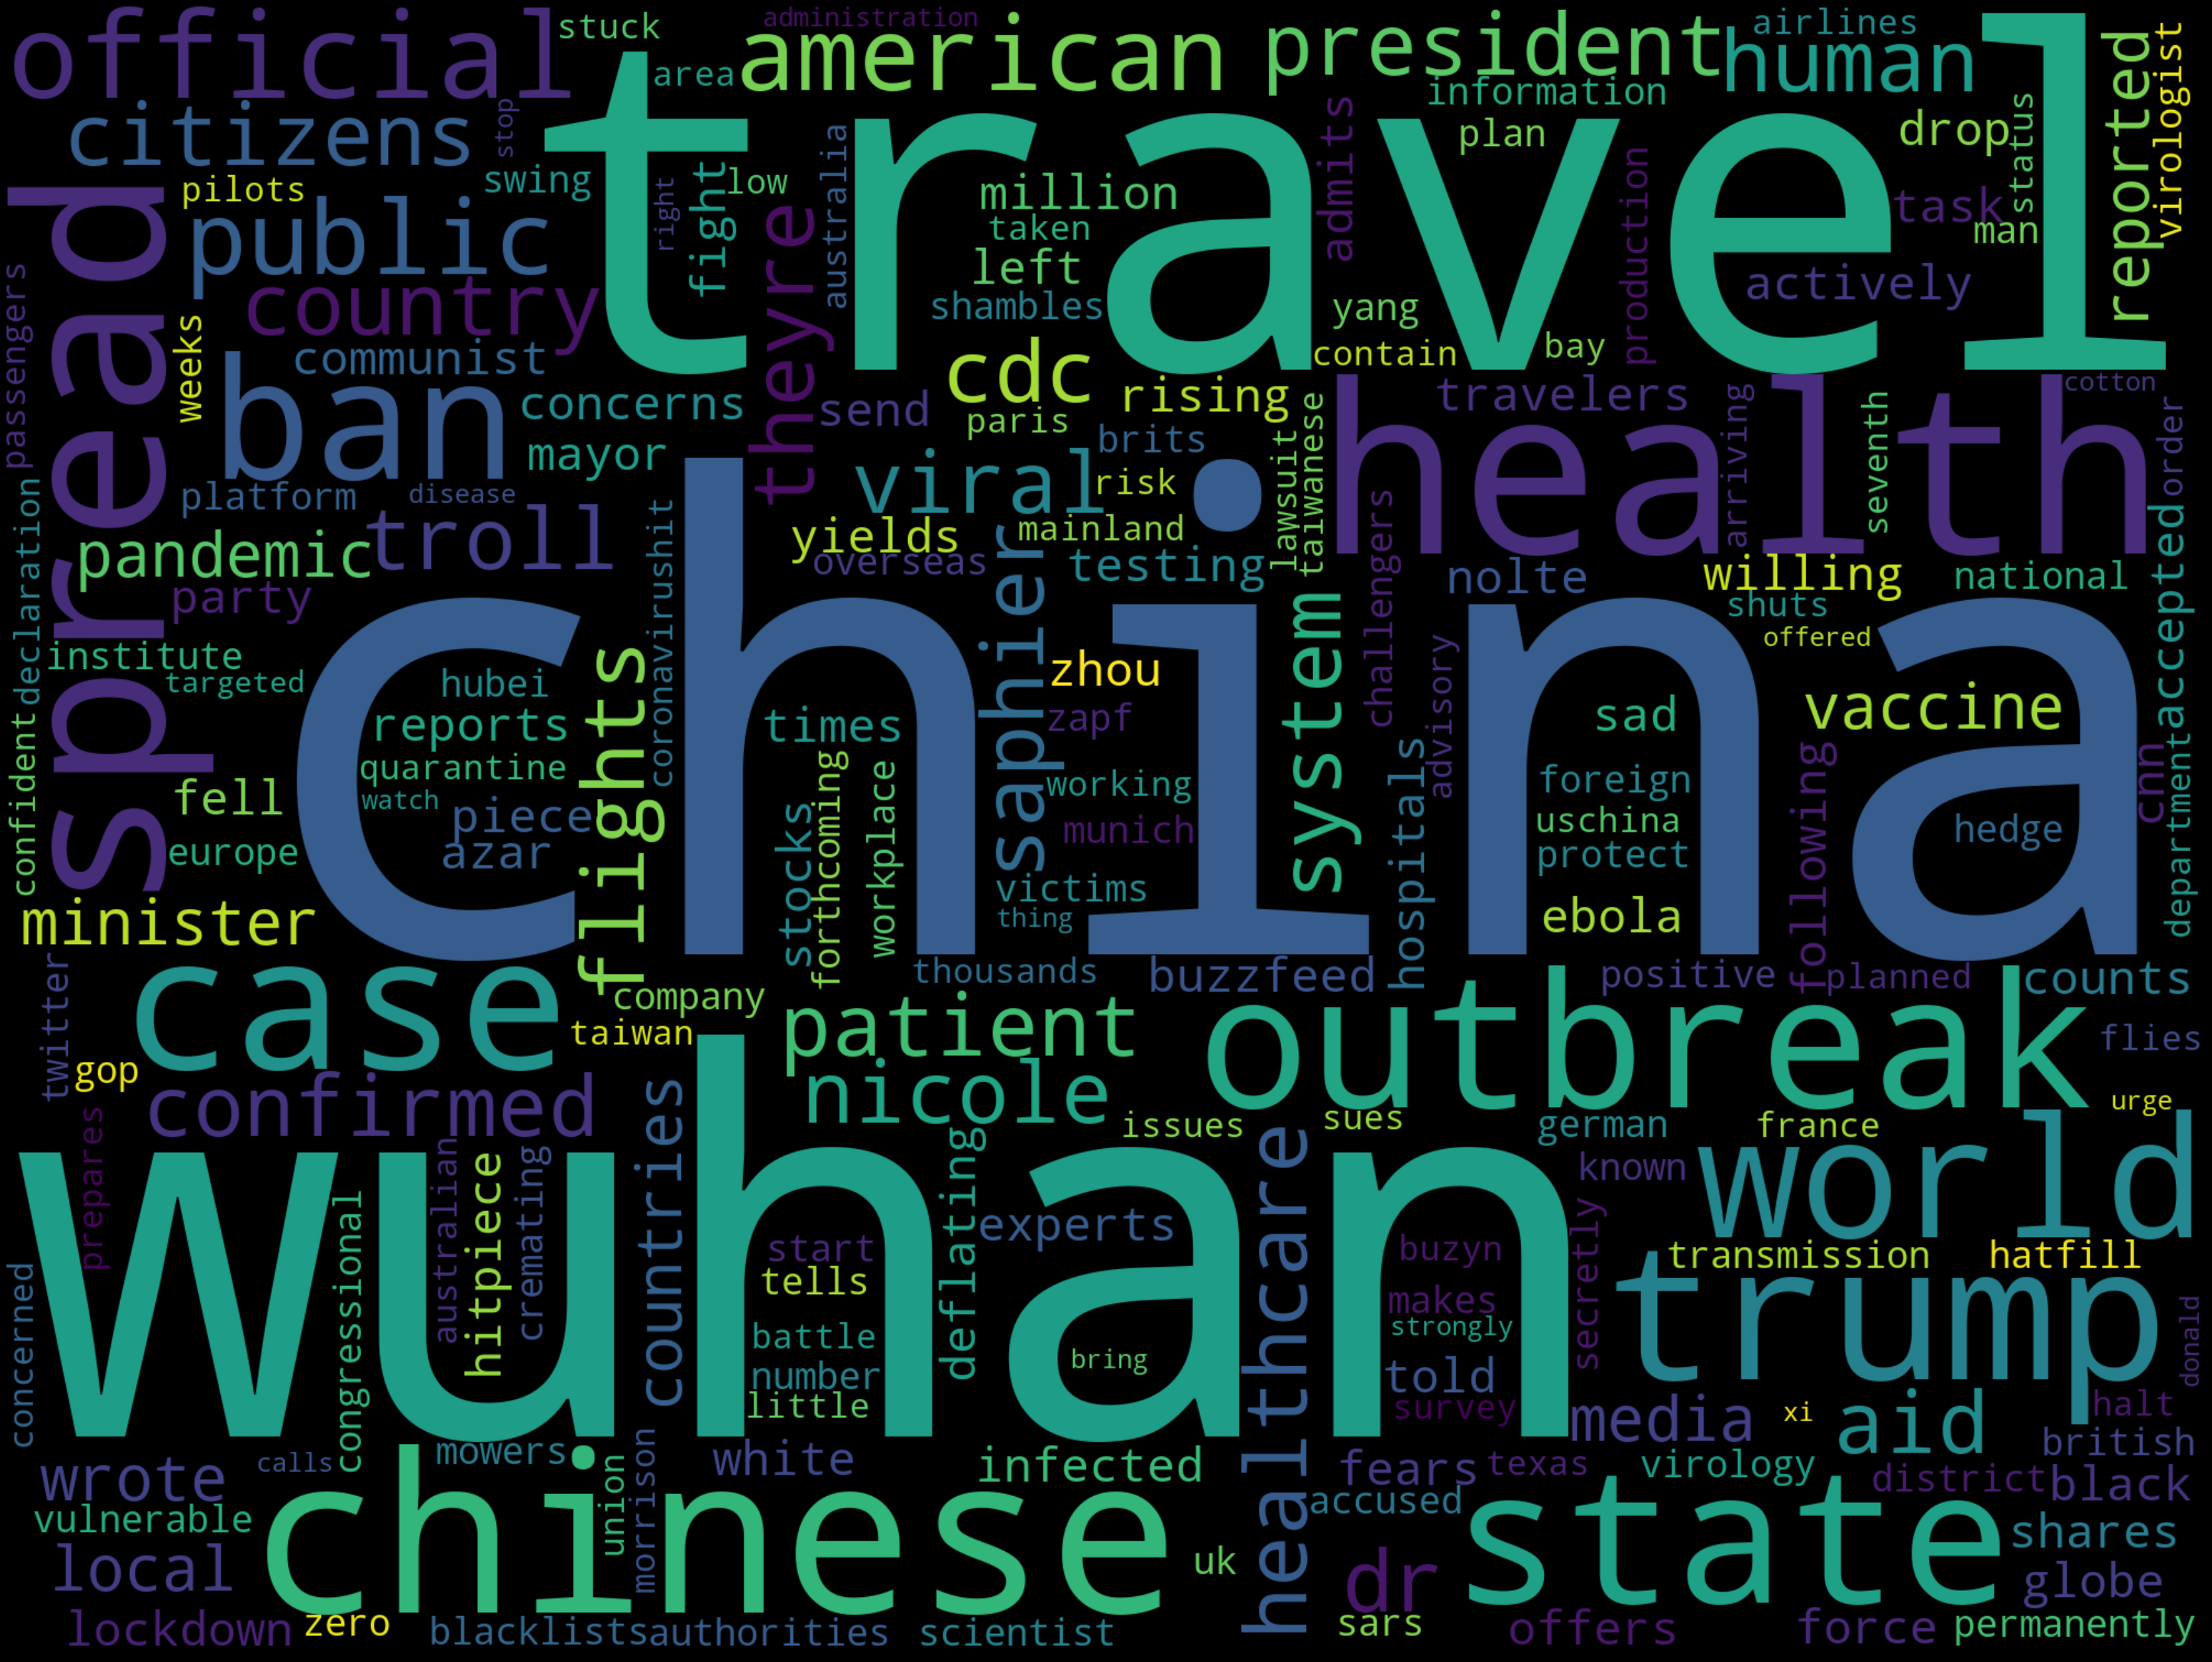

In [58]:
text = " ".join(newlist)
wordcloud = WordCloud(
    width = 2000,
    height = 1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()